In [26]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Установка таймаута (в секундах)
timeout_seconds = 60

# Загрузка токенизатора и модели
# Первый запуск без  local_files_only=True
tokenizer = BertTokenizer.from_pretrained('s-nlp/russian_toxicity_classifier')
model = BertForSequenceClassification.from_pretrained('s-nlp/russian_toxicity_classifier')

# Создаем pipeline для удобства
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Загрузка данных
messages = pd.read_csv(r'messages.csv')

Распределение Toxicity Label:
Toxicity Label
neutral    636
toxic      195
Name: count, dtype: int64

Средний Toxicity Score по Toxicity Label:
Toxicity Label
neutral    0.970441
toxic      0.926383
Name: Toxicity Score, dtype: float64


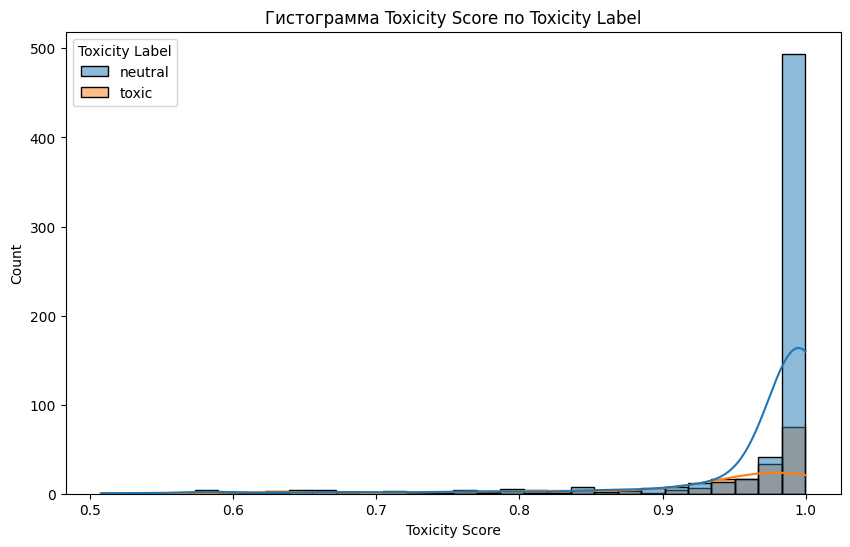

C:\Users\drusl\AppData\Local\Temp\ipykernel_14916\1125631598.py:29: UserWarning: Parsing dates in %d.%m.%Y %H:%M:%S UTC%z format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  messages['Date'] = pd.to_datetime(messages['Date'])


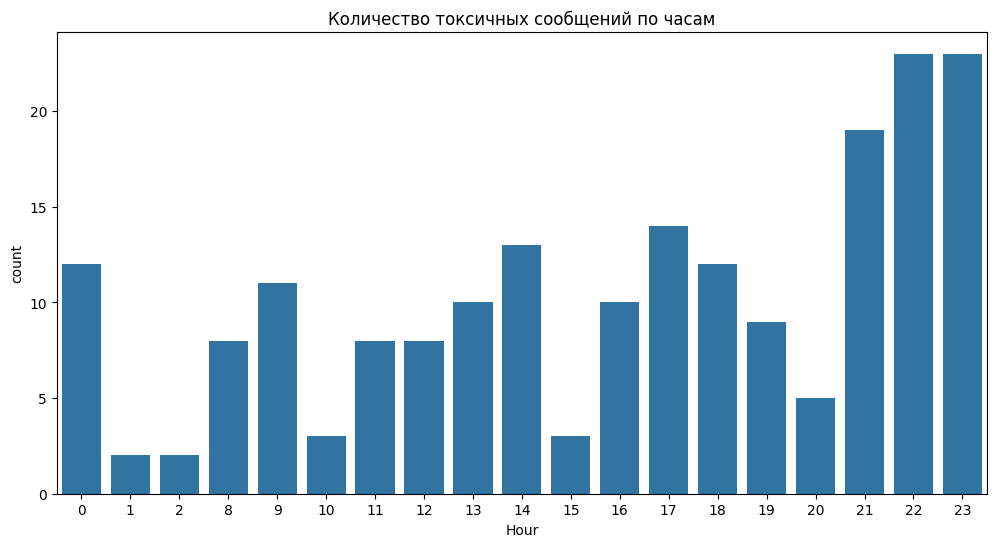

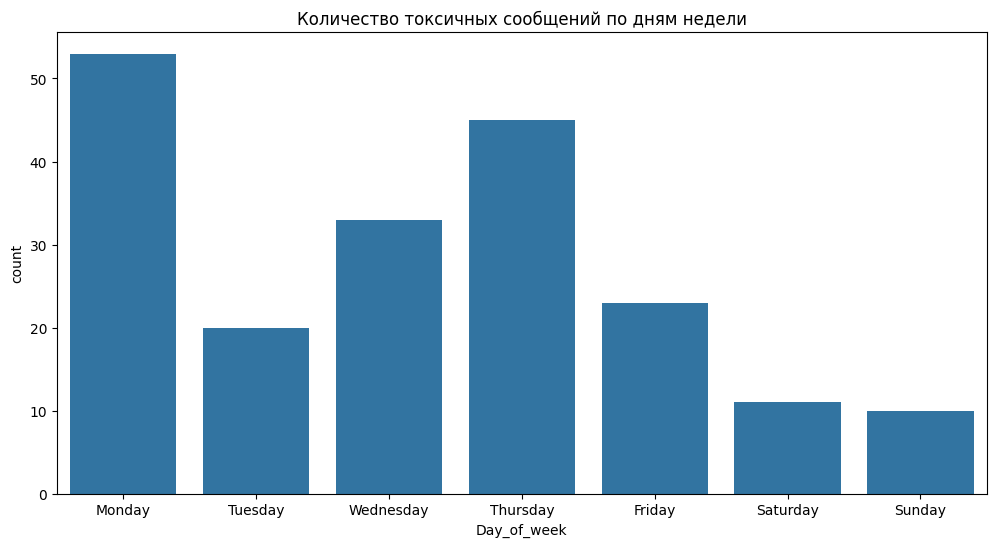


Количество токсичных сообщений по порогу (>= 0.5):
Is Toxic
True     831
False    120
Name: count, dtype: int64

Выводы:
1. Распределение токсичности:
   - Выявлено распределение токсичных и нетоксичных сообщений.
   - Средний уровень токсичности отличается в зависимости от метки.
2. Временные тренды:
   - Заметна активность по времени суток и дням недели.
3. Пороговое значение токсичности:
   - Определено количество токсичных сообщений на основе установленного порога.


In [28]:
def analyze_toxicity(text):
    if isinstance(text, str):
        # Обрезаем текст до максимальной длины
        max_length = 512
        truncated_text = text[:max_length]
        result = classifier(truncated_text)
        return result[0]['label'], result[0]['score']
    else:
         return None, None # Возвращаем None, если текст не является строкой

# Применяем анализ токсичности к каждой строке
messages[['Toxicity Label', 'Toxicity Score']] = messages['Message'].apply(lambda x: pd.Series(analyze_toxicity(x)))


# 1. Анализ токсичности
print("Распределение Toxicity Label:")
print(messages['Toxicity Label'].value_counts())

print("\nСредний Toxicity Score по Toxicity Label:")
print(messages.groupby('Toxicity Label')['Toxicity Score'].mean())

plt.figure(figsize=(10, 6))
sns.histplot(messages, x='Toxicity Score', hue='Toxicity Label', kde=True, bins=30)
plt.title('Гистограмма Toxicity Score по Toxicity Label')
plt.show()


# 2. Анализ временных трендов
messages['Date'] = pd.to_datetime(messages['Date'])
messages['Hour'] = messages['Date'].dt.hour
messages['Day_of_week'] = messages['Date'].dt.day_name()

toxic_messages = messages[messages['Toxicity Label'] == 'toxic']

# График количества токсичных сообщений по часам
plt.figure(figsize=(12, 6))
sns.countplot(data=toxic_messages, x='Hour')
plt.title('Количество токсичных сообщений по часам')
plt.show()

# График количества токсичных сообщений по дням недели
plt.figure(figsize=(12, 6))
sns.countplot(data=toxic_messages, x='Day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Количество токсичных сообщений по дням недели')
plt.show()
# 3. Пороговое значение токсичности
# Пример установки порога на 0.5, вы можете его изменить
threshold = 0.5
messages['Is Toxic'] = messages['Toxicity Score'] > threshold
print("\nКоличество токсичных сообщений по порогу (>= 0.5):")
print(messages['Is Toxic'].value_counts())

# Выводы
print("\nВыводы:")
print("1. Распределение токсичности:")
print("   - Выявлено распределение токсичных и нетоксичных сообщений.")
print("   - Средний уровень токсичности отличается в зависимости от метки.")
print("2. Временные тренды:")
print("   - Заметна активность по времени суток и дням недели.")
print("3. Пороговое значение токсичности:")
print("   - Определено количество токсичных сообщений на основе установленного порога.")

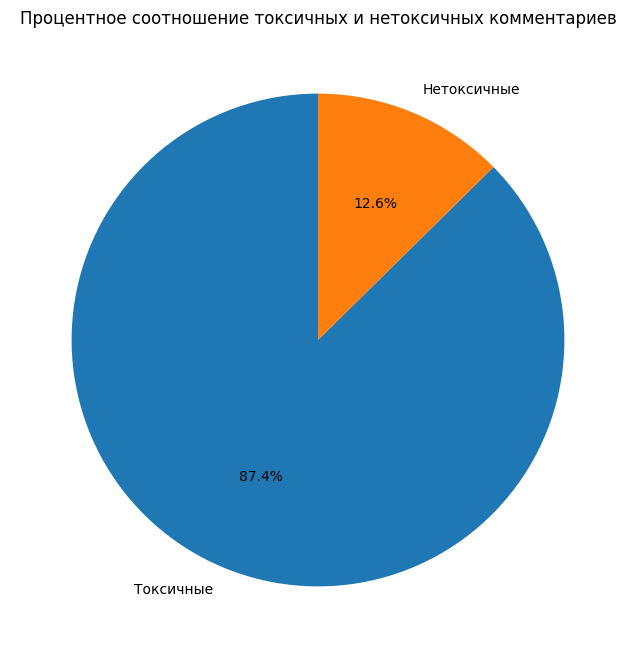

In [33]:
threshold = 0.5
messages['Is Toxic'] = messages['Toxicity Score'] >= threshold

# Подсчет токсичных и нетоксичных сообщений
toxic_counts = messages['Is Toxic'].value_counts()

# Создание круговой диаграммы
labels = ['Токсичные', 'Нетоксичные']
plt.figure(figsize=(8, 8))
plt.pie(toxic_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Процентное соотношение токсичных и нетоксичных комментариев')
plt.show()

In [36]:
# Сортируем реакции и берем топ-N
top_n = 10
top_reactions = reactions.nlargest(top_n, 'Count')

# Вывод топа реакций в командную строку
print(f"Топ {top_n} реакций:")
for index, row in top_reactions.iterrows():
    print(f"- {row['Reaction']}: {row['Count']}")

Топ 10 реакций:
- ❤: 2870
- 🤡: 1133
- Like: 865
- 🦄: 842
- Dislike: 745
- 🤮: 571
- Fire: 549
- 💘: 480
- ❤‍🔥: 468
- 💋: 353
